In [1]:
import numpy as np
from numpy import array,shape,transpose,dot
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=array([[21,18],[23,16],[22,21],[24,20],[19,22],[26,31],[27,40],[29,39],[18,18],[20,18],[30,38]])
y=array([[0,0,0,1,0,1,1,1,0,0,1]])
y=transpose(y)
print x,'\n',shape(x),'\n',y

[[21 18]
 [23 16]
 [22 21]
 [24 20]
 [19 22]
 [26 31]
 [27 40]
 [29 39]
 [18 18]
 [20 18]
 [30 38]] 
(11, 2) 
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]


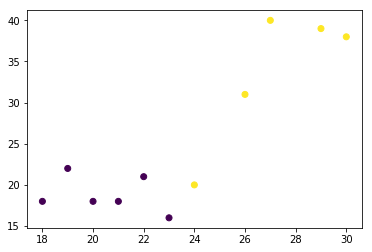

In [3]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [4]:
z=np.ones((11,1))
print z

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


In [5]:
x=np.append(x, z, axis=1)
print x

[[ 21.  18.   1.]
 [ 23.  16.   1.]
 [ 22.  21.   1.]
 [ 24.  20.   1.]
 [ 19.  22.   1.]
 [ 26.  31.   1.]
 [ 27.  40.   1.]
 [ 29.  39.   1.]
 [ 18.  18.   1.]
 [ 20.  18.   1.]
 [ 30.  38.   1.]]


In [6]:
x=np.roll(x,1)
print x

[[  1.  21.  18.]
 [  1.  23.  16.]
 [  1.  22.  21.]
 [  1.  24.  20.]
 [  1.  19.  22.]
 [  1.  26.  31.]
 [  1.  27.  40.]
 [  1.  29.  39.]
 [  1.  18.  18.]
 [  1.  20.  18.]
 [  1.  30.  38.]]


In [7]:
# create function for gradient descent
def gradient_descent(x,y):
    # m is number of trainning set
    # n no fo features
    n=shape(x)[1]
    m=shape(x)[0] # also shape(y)[0]
    t=np.ones((n,1)) # matrix like [[1],[1]]
    for i in range(0,100000):
        log=1 / (1 + (np.exp(-(dot(x,t)))))
        s=log-y
        l=dot(transpose(x),s)
        t=t - ((0.05 * l)/(m))
    
    return t


#how to determine value of alpha

In [8]:
parm=gradient_descent(x,y)
print parm

[[-40.73218196]
 [  1.46826435]
 [  0.3197336 ]]


In [9]:
def prediction(parm,x):
    return 1/(1+ np.exp(-(dot(transpose(parm),x))))



In [10]:
a=array([[1],[22],[25]])
print a

[[ 1]
 [22]
 [25]]


In [11]:
print prediction(parm,a)

[[ 0.39244975]]


In [12]:
def line(x):
    return (-(parm[0] + (parm[1]*x))) / parm[2]


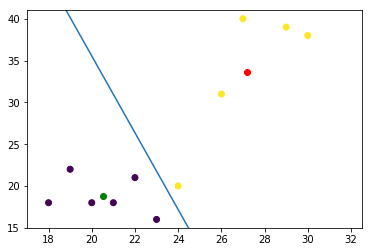

In [13]:
plt.scatter(x[:,1],x[:,2],c=y)
xx=np.linspace(15,35)
plt.axis([17,32.5,15,41])
yy=line(xx.reshape(xx.shape[0],1))
plt.scatter(20.5,18.8,c='g')
plt.scatter(27.2,33.6,c='r')
plt.plot(xx,yy)
plt.show()

In [14]:
a=array([[1],[26],[40]])
print prediction(parm,a)

[[ 0.999964]]


In [17]:
def prob(y):
    m=np.shape(y)[0]#no of trainning set
    prob=np.empty([m,2])
    k=0
    for i in range(0,2):
        for j in range(0,m):
            if(y[j] == k):
                prob[j][i]=1
            else:
                prob[j][i]=0
        k=k+1
    
    return prob

In [18]:
print prob(y)

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]


In [19]:
def hypothesis(x,y):
    n=np.shape(x)[1]#no of parameter
    m=np.shape(x)[0]#no of trainning set
    pro=prob(y)
    t=np.zeros((n,2))
    for i in range(0,50000):
        nu=np.exp(-(dot(x,t)))
        de=transpose(array([[sum(nu[i]) for i in range(m)]]))
        log=nu/de
        l=pro-log
        s=dot(transpose(x),l)
        #l=dot(transpose(x),s)
        t=t - ((0.5 * s)/(m))
    
    return t

In [20]:
k=hypothesis(x,y)
print k,'\n',k[2][0]

[[-242.61274962  242.61274962]
 [   7.47013613   -7.47013613]
 [   3.45396721   -3.45396721]] 
3.4539672096


In [23]:
def pred(x):
    l=dot(transpose(k),x)
    l=np.exp(l)
    su=0
    for i in range(0,2):
        su=su+l[i]
    
    return l/su

In [24]:
print pred([[1],[26],[40]])

[[  1.00000000e+00]
 [  1.06468696e-78]]


In [28]:
def line1(x):
    return (-(k[0][0] + (k[1][0]*x))) / k[2][0]

def line2(x):
    return (-(k[0][1] + (k[1][1]*x))) / k[2][1]

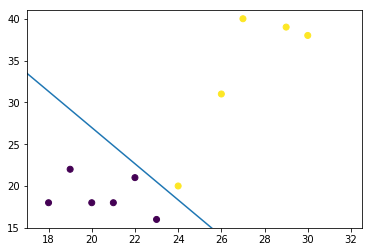

In [31]:
plt.scatter(x[:,1],x[:,2],c=y)
xx=np.linspace(15,35)
plt.axis([17,32.5,15,41])
yy=line1(xx.reshape(xx.shape[0],1))
yyy=line2(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)
plt.plot(xx,yyy)

plt.show()